In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [130]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# 0~1 scaling 
x_train = x_train / 255.0
x_test = x_test / 255.0

# one hot encoding 
y_train = keras.utils.to_categorical(y_train, num_classes= 10)
y_test = keras.utils.to_categorical(y_test, num_classes= 10)

In [131]:
x_train = np.expand_dims(x_train, -1)

In [189]:
model = keras.Sequential()

model.add( keras.layers.InputLayer(input_shape= (28,28,1) ))
model.add( keras.layers.Conv2D( 64, (3,3)) )
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add( keras.layers.Conv2D( 128, (3,3)) )
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dense( 256, activation='sigmoid' ))
model.add( keras.layers.Dense( 128, activation='sigmoid' ))
model.add( keras.layers.Dense( 64, activation='sigmoid' ))
model.add( keras.layers.Dense( 32, activation='sigmoid' ))
model.add( keras.layers.Dense( 10, activation='softmax' ))

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 937,514 (3.58 MB)

 Trainable params: 937,514 (3.58 MB)

 Non-trainable params: 0 (0.00 B)

In [190]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=256, epochs=10, validation_split=0.1)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.3493 - loss: 2.0372 - val_accuracy: 0.9097 - val_loss: 0.7666
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9466 - loss: 0.5847 - val_accuracy: 0.9813 - val_loss: 0.2124
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9795 - loss: 0.1824 - val_accuracy: 0.9845 - val_loss: 0.1124
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9876 - loss: 0.0914 - val_accuracy: 0.9875 - val_loss: 0.0806
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9916 - loss: 0.0593 - val_accuracy: 0.9852 - val_loss: 0.0735
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9921 - loss: 0.0462 - val_accuracy: 0.9873 - val_loss: 0.0618
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9954 - loss: 0.0300 - val_accuracy: 0.9865 - val_loss: 0.0560
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9956 - loss: 0.0254 - val_accu

In [152]:
from PIL import Image

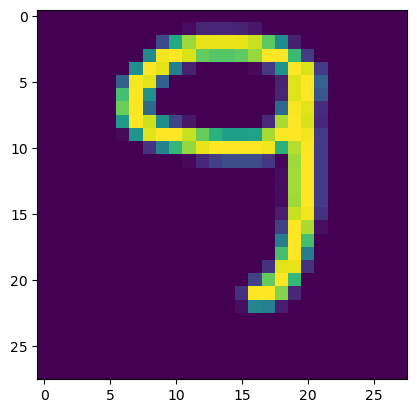

In [191]:
##  손으로 쓴 글씨 를 불러와보기 (그림판 활용)

myimg = Image.open("mynumber2.png")
myimg = np.array(myimg.resize((28, 28)))
myimg = np.mean(myimg, axis=2)
myimg = np.abs(myimg - 255.)

plt.imshow(myimg) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
model predicted as = 7


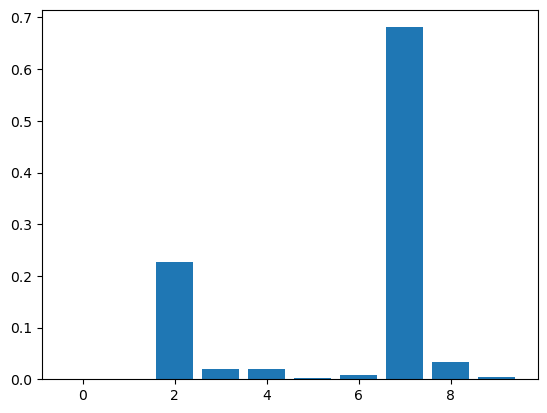

In [192]:

predicted_value = model.predict(myimg.reshape(1, 28, 28)).reshape(10)

plt.bar( x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], height = predicted_value) 
print(f"model predicted as = {np.argmax(predicted_value)}" )
